Import the required libraries

In [644]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import json
import seaborn as sns



%pip install currencyconverter
from currency_converter import CurrencyConverter

Note: you may need to restart the kernel to use updated packages.


Import the dataset

In [2]:
# df = pd.read_csv('https://query.data.world/s/4hitawaxckoxcgheh3mdxb5tafsmq6?dws=00000')
df = pd.read_csv('7210_1.csv', low_memory=False)

Copy the dataset for comparing the cleaned and non cleaned

In [930]:
df_cpy = df.copy()

Get the first 10 rows

In [931]:
df_cpy.head(10)

,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,...,skus,sourceURLs,upc,vin,websiteIDs,weight,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AVpe__JXilAPnD_xSt3F,NaN,Pedi Couture,"Clothing,Shoes,Women's Shoes,All Women's Shoes",NaN,NaN,2016-11-10T09:13:23Z,2016-11-10T09:13:23Z,"[{""dateSeen"":[""2016-11-10T09:13:23Z""],""sourceU...",NaN,...,NaN,https://www.walmart.com/ip/PEDI-COUTURE-Women-...,8.396132e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AVpe_0mrilAPnD_xSqI7,NaN,ANNE KLEIN SPORT,"Clothing,Shoes,Women's Shoes,All Women's Shoes",NaN,NaN,2016-08-02T08:29:11Z,2016-08-02T08:29:11Z,"[{""dateSeen"":[""2016-08-02T08:29:11Z""],""sourceU...",NaN,...,NaN,http://www.walmart.com/ip/Anne-Klein-Sport-Per...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AVpe_0mrilAPnD_xSqI7,NaN,ANNE KLEIN SPORT,"Clothing,Shoes,Women's Shoes,All Women's Shoes",NaN,NaN,2016-08-02T08:29:11Z,2016-08-02T08:29:11Z,"[{""dateSeen"":[""2016-08-02T08:29:11Z""],""sourceU...",NaN,...,NaN,http://www.walmart.com/ip/Anne-Klein-Sport-Per...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Get the columns

In [932]:
df_cpy.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateAdded',
       'dateUpdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageURLs', 'isbn', 'keys', 'manufacturer',
       'manufacturerNumber', 'merchants', 'name', 'prices.amountMin',
       'prices.amountMax', 'prices.availability', 'prices.color',
       'prices.condition', 'prices.count', 'prices.currency',
       'prices.dateAdded', 'prices.dateSeen', 'prices.flavor', 'prices.isSale',
       'prices.merchant', 'prices.offer', 'prices.returnPolicy',
       'prices.shipping', 'prices.size', 'prices.source', 'prices.sourceURLs',
       'prices.warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceURLs', 'upc', 'vin', 'websiteIDs', 'weight', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51'],
      dtype='object')

Get the info

In [933]:
df_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33801 entries, 0 to 33800
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   33801 non-null  object 
 1   asins                2422 non-null   object 
 2   brand                32817 non-null  object 
 3   categories           33801 non-null  object 
 4   colors               19844 non-null  object 
 5   count                0 non-null      float64
 6   dateAdded            33801 non-null  object 
 7   dateUpdated          33801 non-null  object 
 8   descriptions         28425 non-null  object 
 9   dimension            1177 non-null   object 
 10  ean                  9778 non-null   float64
 11  features             27181 non-null  object 
 12  flavors              0 non-null      float64
 13  imageURLs            22309 non-null  object 
 14  isbn                 0 non-null      float64
 15  keys                 33801 non-null 

Describe all the columns

In [934]:
df_cpy.describe(include='all')

,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,...,skus,sourceURLs,upc,vin,websiteIDs,weight,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
count,33801,2422,32817,33801,19844,0.0,33801,33801,28425,1177,...,22135,33801,1.072400e+04,0.0,0.0,1263,0.0,0.0,0.0,1
unique,9996,1245,1360,894,2065,NaN,7006,6506,7186,100,...,3808,9993,NaN,NaN,NaN,69,NaN,NaN,NaN,1
top,AVpfiLB71cnluZ0-mdRy,"B002MUU6JG,B017MXDUZY,B002MUSAQW,B002MUSAQC,B0...",Journee Collection,"Clothing,Shoes,Women's Shoes,All Women's Shoes",Black,NaN,2017-03-28T11:43:08Z,2017-03-28T11:42:28Z,"[{""dateSeen"":[""2017-03-25T09:34:20.165Z""],""sou...",6.0 in x 6.0 in x 1.0 in,...,"[{""sourceURLs"":[""http://www.ralphlauren.com/pr...",http://www.ralphlauren.com/product/index.jsp?p...,NaN,NaN,NaN,499 g,NaN,NaN,NaN,9 g
freq,79,57,1401,3156,2928,NaN,253,415,67,238,...,79,79,NaN,NaN,NaN,559,NaN,NaN,NaN,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.808845e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.836908e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.151870e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.410790e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.026160e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.865210e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Get all the missing values

In [935]:
df_cpy.isna().sum()

id                         0
asins                  31379
brand                    984
categories                 0
colors                 13957
count                  33801
dateAdded                  0
dateUpdated                0
descriptions            5376
dimension              32624
ean                    24023
features                6620
flavors                33801
imageURLs              11492
isbn                   33801
keys                       0
manufacturer           24522
manufacturerNumber      2367
merchants              18419
name                       0
prices.amountMin           0
prices.amountMax           0
prices.availability    33494
prices.color           16380
prices.condition       21786
prices.count           33801
prices.currency            0
prices.dateAdded           0
prices.dateSeen            0
prices.flavor          33801
prices.isSale              0
prices.merchant         3875
prices.offer           27003
prices.returnPolicy    32427
prices.shippin

As we can see, there are a lot of values to be removed, from here we will analyze all the columns with missing values.

First now check the data types of missing datas

In [936]:
df_cpy.loc[:, df_cpy.isna().any(axis=0)].dtypes

asins                   object
brand                   object
colors                  object
count                  float64
descriptions            object
dimension               object
ean                    float64
features                object
flavors                float64
imageURLs               object
isbn                   float64
manufacturer            object
manufacturerNumber      object
merchants               object
prices.availability     object
prices.color            object
prices.condition        object
prices.count           float64
prices.flavor          float64
prices.merchant         object
prices.offer            object
prices.returnPolicy     object
prices.shipping         object
prices.size             object
prices.source          float64
prices.warranty        float64
quantities              object
reviews                 object
sizes                   object
skus                    object
upc                    float64
vin                    float64
websiteI

Check all the columns that the entire rows are null

In [937]:
# get the columns that have all null values
(nulled_col := df_cpy.columns[df_cpy.isnull().all(axis=0)])

Index(['count', 'flavors', 'isbn', 'prices.count', 'prices.flavor',
       'prices.source', 'prices.warranty', 'vin', 'websiteIDs', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50'],
      dtype='object')

Remove the columns that the entire rows are null

In [938]:
# drop the null columns
df_cpy.drop(nulled_col, axis=1, inplace=True)
df_cpy.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'descriptions', 'dimension', 'ean', 'features',
       'imageURLs', 'keys', 'manufacturer', 'manufacturerNumber', 'merchants',
       'name', 'prices.amountMin', 'prices.amountMax', 'prices.availability',
       'prices.color', 'prices.condition', 'prices.currency',
       'prices.dateAdded', 'prices.dateSeen', 'prices.isSale',
       'prices.merchant', 'prices.offer', 'prices.returnPolicy',
       'prices.shipping', 'prices.size', 'prices.sourceURLs', 'quantities',
       'reviews', 'sizes', 'skus', 'sourceURLs', 'upc', 'weight',
       'Unnamed: 51'],
      dtype='object')

The <code>quantities</code> and <code>skus</code> column consists of json formatted strings, therefore we should get the 'value' key

In [939]:
# parse the json string to a python dictionary if it's not NaN
data_qty = df_cpy['quantities'].map(lambda x: json.loads(x) if pd.notnull(x) else x)

for i, v in data_qty.items():
    try:
        if len(v) > 1:
            # get the max value of the list
            v = max(v, key=lambda x: x['value'])['value']
        else:
            v = v[0]['value']
            
        # set the max value to the column
        df_cpy.loc[i, 'quantities'] = v
    except TypeError:
        df_cpy.loc[i, 'quantities'] = np.nan


# set the column to float
df_cpy['quantities'] = df_cpy['quantities'].astype(float)


Get all the data numerical data types that has missing values

In [940]:
(nulled_num := df_cpy.loc[:, df_cpy.isna().any(axis=0)].select_dtypes(include=['float64', 'int64']).columns)

Index(['ean', 'quantities', 'upc'], dtype='object')

Handle all the missing data for numerical values by using the mean

In [941]:
df_cpy[nulled_num] = df_cpy[nulled_num].fillna(df_cpy[nulled_num].mean())
df_cpy[nulled_num].isna().sum() # check

ean           0
quantities    0
upc           0
dtype: int64

Check all the columns that was 50% of its data are missing

In [942]:
# Check all the columns that was 50% of its data are missing
(nulled_50 := 
 df_cpy.loc[
     :, 
     df_cpy.drop(
        df_cpy.dropna(
            axis=1, 
            thresh=df.shape[0] * 0.50, 
            inplace=False), 
        axis=1)
        .columns].columns)


Index(['asins', 'dimension', 'manufacturer', 'merchants',
       'prices.availability', 'prices.condition', 'prices.offer',
       'prices.returnPolicy', 'prices.shipping', 'prices.size', 'reviews',
       'sizes', 'weight', 'Unnamed: 51'],
      dtype='object')

Remove all the nulled columns and nulled 50% columns

In [943]:
df_cpy.drop(nulled_50, axis=1, inplace=True)
df_cpy.columns

Index(['id', 'brand', 'categories', 'colors', 'dateAdded', 'dateUpdated',
       'descriptions', 'ean', 'features', 'imageURLs', 'keys',
       'manufacturerNumber', 'name', 'prices.amountMin', 'prices.amountMax',
       'prices.color', 'prices.currency', 'prices.dateAdded',
       'prices.dateSeen', 'prices.isSale', 'prices.merchant',
       'prices.sourceURLs', 'quantities', 'skus', 'sourceURLs', 'upc'],
      dtype='object')

Check the nulls

In [944]:
df_cpy.isna().sum()

id                        0
brand                   984
categories                0
colors                13957
dateAdded                 0
dateUpdated               0
descriptions           5376
ean                       0
features               6620
imageURLs             11492
keys                      0
manufacturerNumber     2367
name                      0
prices.amountMin          0
prices.amountMax          0
prices.color          16380
prices.currency           0
prices.dateAdded          0
prices.dateSeen           0
prices.isSale             0
prices.merchant        3875
prices.sourceURLs         0
quantities                0
skus                  11666
sourceURLs                0
upc                       0
dtype: int64

The most important columns are the <code>brand</code>, <code>colors / prices.color</code>, <code>features</code>, and <code>description</code> so clean the rows that does not have values in this columns

In [945]:
# clean the rows that does not have values in columns colors, features and descriptions
prev_shape = df_cpy.shape[0]
df_cpy.dropna(subset=['features', 'descriptions', 'brand'], inplace=True)
print(df_cpy.columns)

Index(['id', 'brand', 'categories', 'colors', 'dateAdded', 'dateUpdated',
       'descriptions', 'ean', 'features', 'imageURLs', 'keys',
       'manufacturerNumber', 'name', 'prices.amountMin', 'prices.amountMax',
       'prices.color', 'prices.currency', 'prices.dateAdded',
       'prices.dateSeen', 'prices.isSale', 'prices.merchant',
       'prices.sourceURLs', 'quantities', 'skus', 'sourceURLs', 'upc'],
      dtype='object')


Special case for <code>colors</code> and <code>prices.color</code>

In [946]:
#combine the colors and prices.color

df_cpy['colors'] = df_cpy['colors'].fillna(df_cpy['prices.color'])

# drop the prices.color column
df_cpy.drop('prices.color', axis=1, inplace=True)

# drop the nulls on colors


print(f'{((prev_shape - df_cpy.shape[0]) / prev_shape)*100:.2f}% of the rows were dropped') 
print(df_cpy.columns)

25.88% of the rows were dropped
Index(['id', 'brand', 'categories', 'colors', 'dateAdded', 'dateUpdated',
       'descriptions', 'ean', 'features', 'imageURLs', 'keys',
       'manufacturerNumber', 'name', 'prices.amountMin', 'prices.amountMax',
       'prices.currency', 'prices.dateAdded', 'prices.dateSeen',
       'prices.isSale', 'prices.merchant', 'prices.sourceURLs', 'quantities',
       'skus', 'sourceURLs', 'upc'],
      dtype='object')


Remove the colors missing values

In [947]:
# remove colors rows with missing values
df_cpy.dropna(subset=['colors'], inplace=True)


In [948]:
df_cpy.isna().sum()

id                       0
brand                    0
categories               0
colors                   0
dateAdded                0
dateUpdated              0
descriptions             0
ean                      0
features                 0
imageURLs             7068
keys                     0
manufacturerNumber     906
name                     0
prices.amountMin         0
prices.amountMax         0
prices.currency          0
prices.dateAdded         0
prices.dateSeen          0
prices.isSale            0
prices.merchant       1252
prices.sourceURLs        0
quantities               0
skus                  4632
sourceURLs               0
upc                      0
dtype: int64

Remove the remaining columns that has missing values

In [949]:
df_cpy.dropna(axis=1, inplace=True)
df_cpy.isna().sum()

id                   0
brand                0
categories           0
colors               0
dateAdded            0
dateUpdated          0
descriptions         0
ean                  0
features             0
keys                 0
name                 0
prices.amountMin     0
prices.amountMax     0
prices.currency      0
prices.dateAdded     0
prices.dateSeen      0
prices.isSale        0
prices.sourceURLs    0
quantities           0
sourceURLs           0
upc                  0
dtype: int64

Converts the date into epoch

In [950]:
#convert date to epoch
for feature in  ['dateAdded', 'dateUpdated', 'prices.dateAdded', 'prices.dateSeen']:
    df_cpy[feature] = pd.to_datetime(df_cpy[feature], errors='coerce')
    
    
    # if the value is not NaN, convert to epoch using lambda
    df_cpy[feature] = df_cpy[feature].map(lambda x: x if pd.isnull(x) else int(x.toordinal()))



Change the price currency into PHP

In [951]:
curs = {}
# get all the currency
for x in df_cpy['prices.currency'].unique():
    curs[x] = CurrencyConverter().convert(1, x, 'PHP')

# convert all the prices to PHP  
for x in curs.keys():
    df_cpy.loc[df_cpy['prices.currency'] == x, 'prices.amountMax'] = df_cpy.loc[df_cpy['prices.currency'] == x, 'prices.amountMax'].map(lambda y: y * curs[x])  
    df_cpy.loc[df_cpy['prices.currency'] == x, 'prices.amountMin'] = df_cpy.loc[df_cpy['prices.currency'] == x, 'prices.amountMin'].map(lambda y: y * curs[x])

# drop the prices.currency column (as all values will be converted to PHP)
df_cpy.drop('prices.currency', axis=1, inplace=True)


In [952]:
df_cpy['prices.amount'] = df_cpy[['prices.amountMax', 'prices.amountMin']].mean(axis=1)

Normalize data

In [953]:
# normalize the data numerical only
df_cpy_norm = df_cpy.select_dtypes(include=['float64', 'int64']).apply(lambda x: x  / x.max())
df_cpy_norm = pd.concat([df_cpy_norm, df_cpy.select_dtypes(exclude=['float64', 'int64'])], axis=1)
df_cpy_norm.head()

,dateAdded,dateUpdated,ean,prices.amountMin,prices.amountMax,prices.dateAdded,quantities,upc,prices.amount,id,...,categories,colors,descriptions,features,keys,name,prices.dateSeen,prices.isSale,prices.sourceURLs,sourceURLs
0,0.999928,0.999978,0.079394,0.063307,0.063307,0.999978,0.15,0.747789,0.063307,AVpe__eOilAPnD_xSt-H,...,"Access.,Clothing,Shoes,Women's Clothing",Purple,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W...",handcraftedalpacablendpurplecharismasweaterper...,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,736414,False,https://www.overstock.com/Worldstock-Fair-Trad...,https://www.overstock.com/Worldstock-Fair-Trad...
1,0.999928,0.999978,0.079394,0.063307,0.063307,0.999978,0.15,0.747789,0.063307,AVpe__eOilAPnD_xSt-H,...,"Access.,Clothing,Shoes,Women's Clothing",Purple,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W...",handcraftedalpacablendpurplecharismasweaterper...,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,736414,False,https://www.overstock.com/Worldstock-Fair-Trad...,https://www.overstock.com/Worldstock-Fair-Trad...
2,0.999928,0.999978,0.079394,0.063307,0.063307,0.999978,0.15,0.747789,0.063307,AVpe__eOilAPnD_xSt-H,...,"Access.,Clothing,Shoes,Women's Clothing",Purple,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W...",handcraftedalpacablendpurplecharismasweaterper...,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,736414,False,https://www.overstock.com/Worldstock-Fair-Trad...,https://www.overstock.com/Worldstock-Fair-Trad...
3,0.999928,0.999978,0.079394,0.063307,0.063307,0.999978,0.15,0.747789,0.063307,AVpe__eOilAPnD_xSt-H,...,"Access.,Clothing,Shoes,Women's Clothing",Purple,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W...",handcraftedalpacablendpurplecharismasweaterper...,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,736414,False,https://www.overstock.com/Worldstock-Fair-Trad...,https://www.overstock.com/Worldstock-Fair-Trad...
4,0.999928,0.999978,0.079394,0.063307,0.063307,0.999943,0.15,0.747789,0.063307,AVpe__eOilAPnD_xSt-H,...,"Access.,Clothing,Shoes,Women's Clothing",Purple,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W...",handcraftedalpacablendpurplecharismasweaterper...,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,736368,True,https://www.overstock.com/Worldstock-Fair-Trad...,https://www.overstock.com/Worldstock-Fair-Trad...


Correlation

In [954]:
df_cpy_norm.corr(numeric_only=True)

,dateAdded,dateUpdated,ean,prices.amountMin,prices.amountMax,prices.dateAdded,quantities,upc,prices.amount,prices.isSale
dateAdded,1.000000,0.027506,-0.033294,0.070507,0.063452,0.315958,-0.096673,-0.029833,0.067043,0.027109
dateUpdated,0.027506,1.000000,-0.043381,0.086585,0.086350,0.428806,-0.034275,-0.055429,0.086559,-0.408867
ean,-0.033294,-0.043381,1.000000,0.071695,0.071835,-0.023028,0.014504,0.845115,0.071841,0.006343
prices.amountMin,0.070507,0.086585,0.071695,1.000000,0.995792,0.039586,0.020879,0.073486,0.998943,-0.172739
prices.amountMax,0.063452,0.086350,0.071835,0.995792,1.000000,0.026880,0.021658,0.073578,0.998952,-0.172770
prices.dateAdded,0.315958,0.428806,-0.023028,0.039586,0.026880,1.000000,0.035712,-0.025538,0.033256,-0.225414
quantities,-0.096673,-0.034275,0.014504,0.020879,0.021658,0.035712,1.000000,0.017427,0.021292,0.000599
upc,-0.029833,-0.055429,0.845115,0.073486,0.073578,-0.025538,0.017427,1.000000,0.073610,0.012025
prices.amount,0.067043,0.086559,0.071841,0.998943,0.998952,0.033256,0.021292,0.073610,1.000000,-0.172937
prices.isSale,0.027109,-0.408867,0.006343,-0.172739,-0.172770,-0.225414,0.000599,0.012025,-0.172937,1.000000


(0.0, 1.0499502512562815)

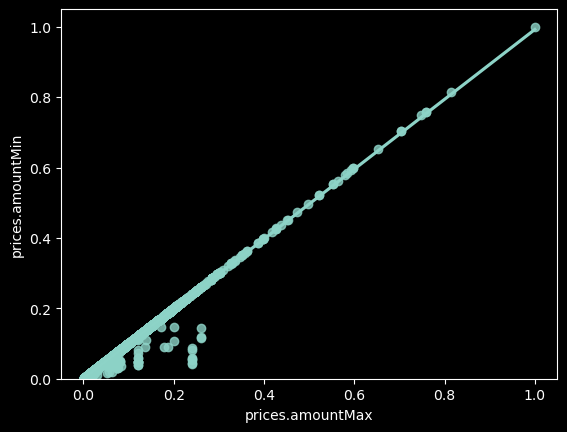

In [955]:
sns.regplot(x='prices.amountMax', y='prices.amountMin', data=df_cpy_norm)
plt.ylim(0,)

(0.0, 1.0503480307826265)

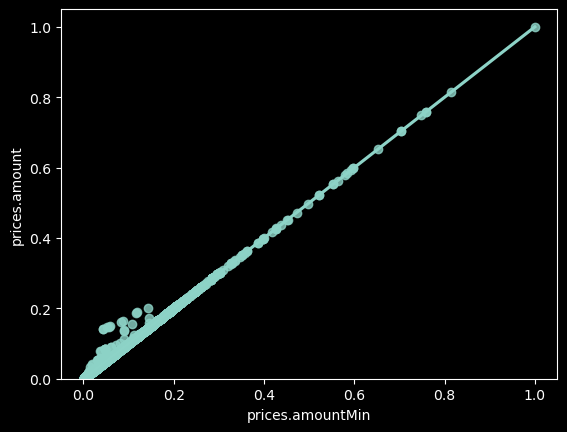

In [956]:
sns.regplot(x='prices.amountMin', y='prices.amount', data=df_cpy_norm)
plt.ylim(0,)

(0.0, 1.0499502512562815)

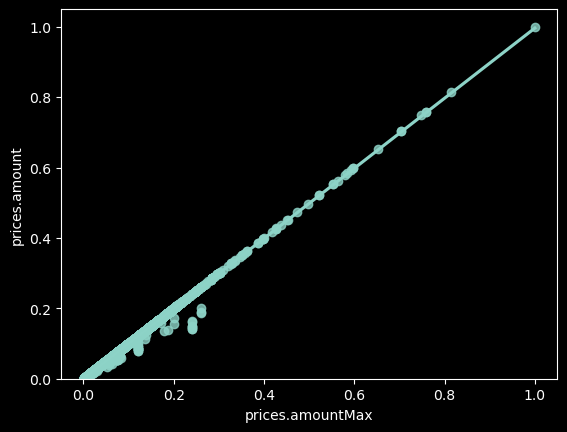

In [957]:
sns.regplot(x='prices.amountMax', y='prices.amount', data=df_cpy_norm)
plt.ylim(0,)

(0.0, 58487.95545965702)

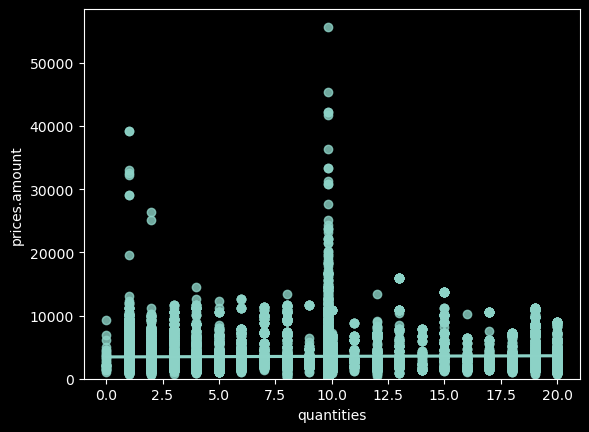

In [973]:
sns.regplot(x='quantities', y='prices.amount', data=df_cpy_norm)
plt.ylim(0,)


(0.0, 1.0499502512562815)

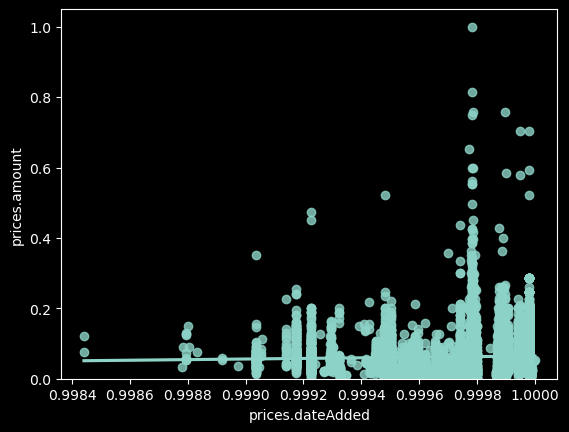

In [959]:
sns.regplot(x='prices.dateAdded', y='prices.amount', data=df_cpy_norm)
plt.ylim(0,)

(0.0, 1.0499502512562815)

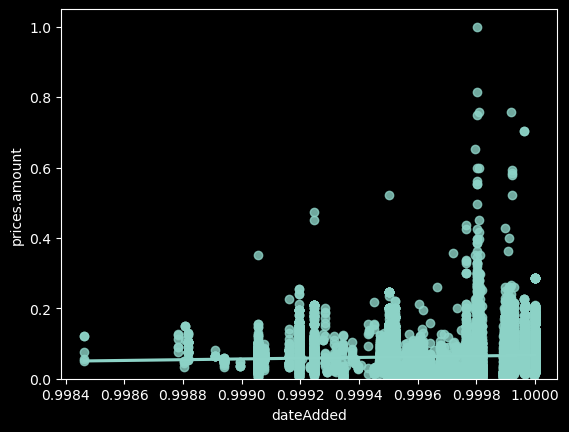

In [960]:
sns.regplot(x='dateAdded', y='prices.amount', data=df_cpy_norm)
plt.ylim(0,)